In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tnrange
import scipy.stats
import pandas as pd
from scipy.stats import rankdata
import matplotlib as mpl
from weightedcorr import WeightedCorr


In [4]:
rep_no = 5

C4_diff_sub_all = np.zeros((rep_no, 2000,2000))
C4_nona_sub_all = np.zeros((rep_no, 2000,2000))
C4_diff_weight_all = np.zeros((rep_no, 2000,2000))
C4_nona_weight_all = np.zeros((rep_no, 2000,2000))

C4_diff_scale_all = np.zeros((rep_no, 2000))
C4_nona_scale_all = np.zeros((rep_no, 2000))


C4_rand_sub_all = np.zeros((rep_no, 2000, 2000))
C4_rand_scale_all = np.random.rand(rep_no, 2000)

for i in tnrange(rep_no):
    if i == 0:
        C4_diff_raw = np.load("/media/hdd01/sklee/CA1_clust4-60/clust/gru_s5_h20_pretrain_output_set"+str(i+1)+".npz")["C_syn_e"]
        C4_nona_raw = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/clust/gru_s5_h20_pretrain_output_set"+str(i+1)+".npz")["C_syn_e"]

        C4_dist_raw = np.load("/media/hdd01/sklee/CA1_clust4-60/data/clust4_syn_dist.npy")[:,-1]

        C4_diff_scale = np.load("/media/hdd01/sklee/CA1_clust4-60/clust/gru_s5_h20_pretrain_output_set"+str(i+1)+".npz")["E_scale"]
        C4_nona_scale = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/clust/gru_s5_h20_pretrain_output_set"+str(i+1)+".npz")["E_scale"]
    
    else:
        C4_diff_raw = np.load("/media/hdd01/sklee/CA1_clust4-60/clust/gru_s5_h20_pretrain_output_set"+str(i+1)+".npz")["C_syn_e"]
        C4_nona_raw = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/clust/gru_s5_h20_pretrain_output_set"+str(i+1)+".npz")["C_syn_e"]

        C4_dist_raw = np.load("/media/hdd01/sklee/CA1_clust4-60/data/clust4_syn_dist.npy")[:,-1]

        C4_diff_scale = np.load("/media/hdd01/sklee/CA1_clust4-60/clust/gru_s5_h20_pretrain_output_set"+str(i+1)+".npz")["E_scale"]
        C4_nona_scale = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/clust/gru_s5_h20_pretrain_output_set"+str(i+1)+".npz")["E_scale"]
    
    C4_diff_scale_all[i] = C4_diff_scale
    C4_nona_scale_all[i] = C4_nona_scale
    
    C4_diff_idx = np.zeros((2000))
    C4_nona_idx = np.zeros((2000))
    
    C4_rand_idx = np.random.randint(0,5,(2000))

    for j in range(2000):
        C4_diff_idx[j] = np.argmax(C4_diff_raw[:,j])
        C4_nona_idx[j] = np.argmax(C4_nona_raw[:,j])

    for j in range(2000):
        for k in range(2000):
            if C4_diff_idx[j] != C4_diff_idx[k]:
                C4_diff_sub_all[i,j,k] = 1
                C4_diff_sub_all[i,k,j] = 1
            if C4_nona_idx[j] != C4_nona_idx[k]:
                C4_nona_sub_all[i,j,k] = 1
                C4_nona_sub_all[i,k,j] = 1
            if C4_rand_idx[j] != C4_rand_idx[k]:
                C4_rand_sub_all[i,j,k] = 1
                C4_rand_sub_all[i,k,j] = 1
                
    for j in range(2000):
        for k in range(2000):
            C4_diff_weight_all[i,j,k] = np.abs(C4_diff_scale[j] - C4_diff_scale[k])
            C4_nona_weight_all[i,j,k] = np.abs(C4_nona_scale[j] - C4_nona_scale[k])

/tmp/ipykernel_28002/2036904475.py:15: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(rep_no):


  0%|          | 0/5 [00:00<?, ?it/s]

In [5]:
C4_clust_idx = np.zeros((2000))

for i in range(4):
    C4_clust_idx[880+60*i:880+60*(i+1)] = i+1
    
C4_clust = np.zeros((2000,2000))

for i in tnrange(2000):
    for j in range(2000):
        if C4_clust_idx[i] != C4_clust_idx[j]:
            C4_clust[i,j] = 1
            C4_clust[j,i] = 1

/tmp/ipykernel_28002/3468471736.py:8: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(2000):


  0%|          | 0/2000 [00:00<?, ?it/s]

In [6]:
C4_dist = np.zeros((2000,2000))

for i in tnrange(2000):
    for j in range(2000):
        C4_dist[i,j] = np.abs(C4_dist_raw[i] - C4_dist_raw[j])


/tmp/ipykernel_28002/2461750139.py:3: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(2000):


  0%|          | 0/2000 [00:00<?, ?it/s]

In [7]:
bg_idx = np.delete(np.arange(2000), np.arange(880,1120))
dist_bg = C4_dist_raw[bg_idx]
bg_plot_idx = bg_idx[np.argsort(dist_bg)]

In [8]:
plot_idx = np.empty((2000))
plot_idx[:240] = np.arange(880,1120)
plot_idx[240:] = bg_plot_idx
plot_idx = plot_idx.astype(int)

C4_dist_plot = C4_dist[:,plot_idx]
C4_dist_plot = C4_dist_plot[plot_idx,:]
C4_clust_plot = C4_clust[:,plot_idx]
C4_clust_plot = C4_clust_plot[plot_idx,:]
C4_diff_sub_plot = np.mean(C4_diff_sub_all[:,:,plot_idx], 0)
C4_diff_sub_plot = C4_diff_sub_plot[plot_idx,:]
C4_nona_sub_plot = np.mean(C4_nona_sub_all[:,:,plot_idx], 0)
C4_nona_sub_plot = C4_nona_sub_plot[plot_idx,:]
C4_diff_weight_plot = np.mean(C4_diff_weight_all[:,:,plot_idx], 0)
C4_diff_weight_plot = C4_diff_weight_plot[plot_idx,:]
C4_nona_weight_plot = np.mean(C4_nona_weight_all[:,:,plot_idx], 0)
C4_nona_weight_plot = C4_nona_weight_plot[plot_idx,:]

In [9]:
x, y = np.triu_indices(2000, k=0)
x_part, y_part = np.triu_indices(240, k=0)
x_part += 880
y_part += 880
x_mini, y_mini = np.triu_indices(240, k=0)

C4_clust_vec = C4_clust[x_part,y_part]
C4_dist_vec = C4_dist[x_part,y_part]

C4_orthog_vec = C4_clust_vec - C4_dist_vec * np.dot(C4_clust_vec, C4_dist_vec) / np.dot(C4_dist_vec, C4_dist_vec)

C4_orthog = np.zeros((240,240))

C4_orthog[x_mini,y_mini] = C4_orthog_vec
C4_orthog[y_mini,x_mini] = C4_orthog_vec

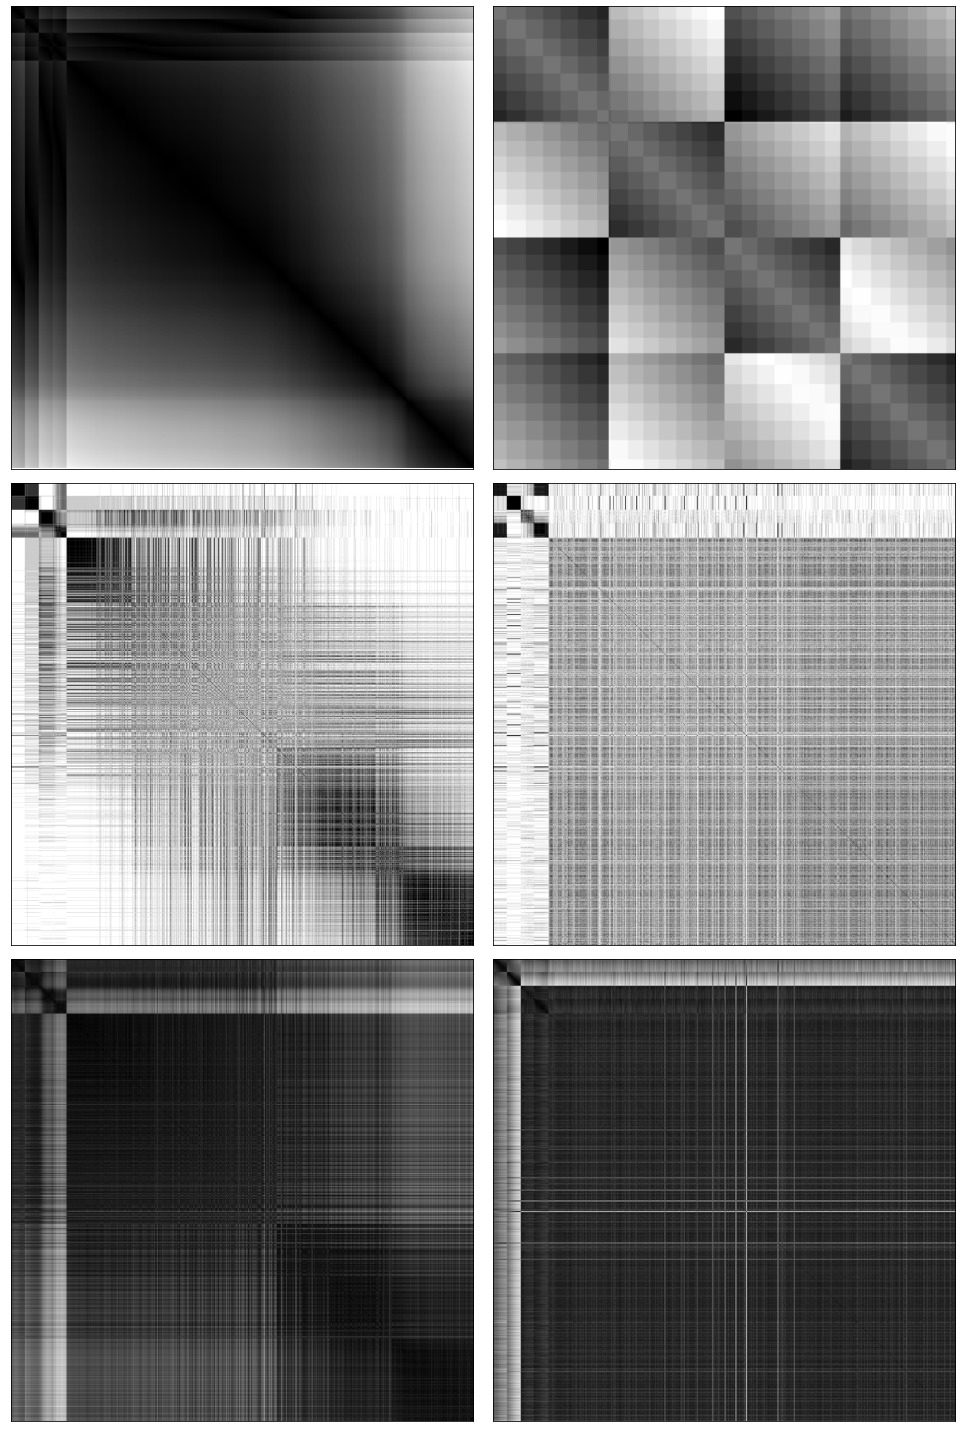

In [13]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14,20))

axs[0,0].imshow(C4_dist_plot, cmap="gray", vmin=np.min(C4_dist_plot), vmax=np.max(C4_dist_plot))
axs[0,1].imshow(C4_orthog, cmap="gray")
axs[1,0].imshow(C4_nona_sub_plot, cmap="gray")
axs[1,1].imshow(C4_diff_sub_plot, cmap="gray")
axs[2,0].imshow(C4_nona_weight_plot, cmap="gray")
axs[2,1].imshow(C4_diff_weight_plot, cmap="gray")

for ax in [axs[0,0], axs[0,1], axs[1,0], axs[1,1], axs[2,0], axs[2,1]]:
    #ax.axis("off")
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
#plt.show()
fig.savefig("/home/sklee/dendrite/fig9/rsa_mat.png", dpi=200, bbox_inches="tight", transparent=True)